In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [4]:
churn = pd.read_csv("C:/Users/Kazembe/Documents/CTHSC/2.2/AI/lms/datasets/Telco-Customer-Churn.csv")


In [5]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#drop customer id column coz its always unique won't have any correlation with churning
churn.drop("customerID" ,axis=1, inplace=True)

In [7]:
#check for columns with missing data
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#label encode all the columns
from sklearn.preprocessing import LabelEncoder
columns = churn.iloc[:0,:]
encoder = LabelEncoder()
for clm in columns:
    churn[clm] = encoder.fit_transform(churn[clm])
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,2660,1


In [9]:
#extracting features with positive coorrelation with churn
corr_matrix = churn.corr()
corr_values = corr_matrix["Churn"].sort_values(ascending=False)

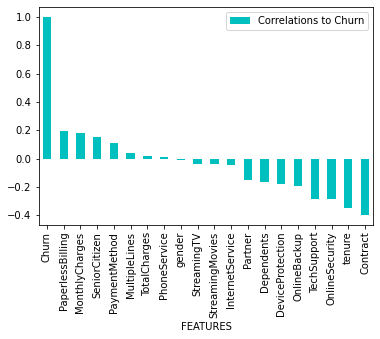

In [10]:
corr_values.plot(kind='bar', xlabel='FEATURES', label='Correlations to Churn',facecolor='c')
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend()

In [11]:
#extracting features with positive coorrelation with churn
X = churn[['PaperlessBilling','MonthlyCharges','SeniorCitizen','PaymentMethod','MultipleLines','TotalCharges','PhoneService']]
y = pd.DataFrame(churn['Churn'])

In [12]:
X

,PaperlessBilling,MonthlyCharges,SeniorCitizen,PaymentMethod,MultipleLines,TotalCharges,PhoneService
0,1,142,0,2,1,2505,0
1,0,498,0,3,0,1466,1
2,1,436,0,3,0,157,1
3,0,266,0,0,1,1400,0
4,1,729,0,2,0,925,1
...,...,...,...,...,...,...,...
7038,1,991,0,3,2,1597,1
7039,1,1340,0,1,2,5698,1
7040,1,137,0,2,1,2994,0
7041,1,795,1,3,2,2660,1


In [13]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [14]:
#Defining and training the model using extreme gradient boost
import xgboost as xgb
df_dmatrix = xgb.DMatrix(data=X, label=y)
df_dmatrix

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model =  xgb.XGBClassifier(objective = 'binary:logistic', colsample_bytree=0.1,learning_rate=0.2,
                        max_depth = 5,alpha=10,n_estimators=10)

In [17]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [18]:
model.fit(X_train,y_train)

C:\Users\Kazembe\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Kazembe\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[15:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
y_pred = model.predict(X_test)

In [20]:
#evaluating the model's accuracy
from sklearn.metrics import mean_squared_error,roc_curve, auc, accuracy_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.49339138655480463

In [21]:
#k-fold cross validation using cv() method
parameters = {'objective':'reg:squarederror', 'colsample_bytree':'0.3', 
                           'learning_rate':'0.1', 'max_depth':'5', 'alpha':'10'}
results = xgb.cv(dtrain=df_dmatrix, params=parameters, nfold=3, num_boost_round=100,
                early_stopping_rounds=10, metrics='rmse', as_pandas=True, seed=123)

In [22]:
#mse reduced 
results['train-rmse-mean'].tail()

95    0.390600
96    0.390549
97    0.390549
98    0.390535
99    0.390504
Name: train-rmse-mean, dtype: float64

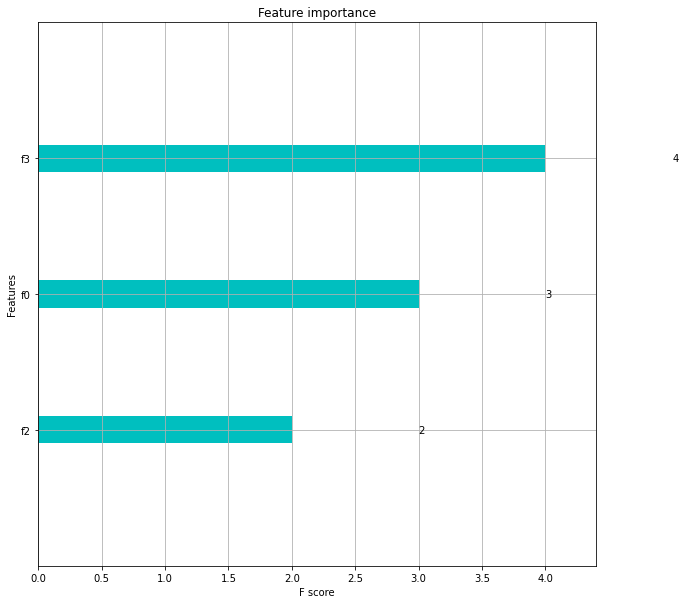

In [23]:
xgb.plot_importance(model,facecolor='c')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

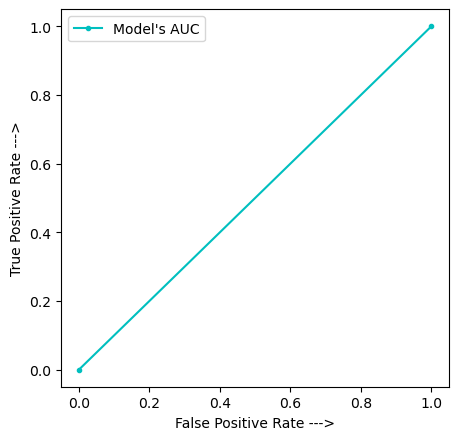

In [24]:
#evaluating model's auc
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label="Model's AUC",color='c')

plt.xlabel('False Positive Rate --->')
plt.ylabel('True Positive Rate --->')

plt.legend()
plt.show()

In [25]:
churn = np.array(churn)

In [26]:
#saing the model in pkl file to use later for the streamlit thing
import pickle
pickle_out = open('model.json', mode='wb')
pickle.dump(model, pickle_out)
#pickle_out.close()

In [27]:
#calculating accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print("The Model's Accuracy : ", accuracy*100, "%")

The Model's Accuracy :  75.65649396735273 %
